## numpy数组通用函数
### 数组与常熟的基本运算
* 数组与任意常数的运算都会默认遍历到数组的中每一个元素
* numpy数组与常数的运算符号本质上就是一系列自定义函数

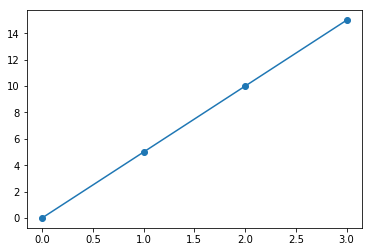

In [4]:
import pylab
x=range(0,4)
y=[i*5 for i in x]#python的经典语法里元素遍历运算必然要使用循环
pylab.plot(x,y,"-o")
pylab.show()

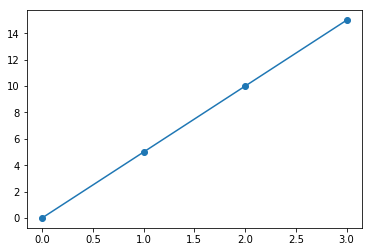

In [3]:
import numpy as np
x1=np.arange(0,4)
y1=x1*5#在numpy的数组里循环遍历的运算已经内在的包含在运算符号中了
pylab.plot(x1,y1,"-o")
pylab.show()

In [5]:
x = [0,1,2,3]
x1 = np.arange(0,4)
print(x,x1)
print(x*3)
print(x1*3)
print(np.multiply(x1,3))

[0, 1, 2, 3] [0 1 2 3]
[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
[0 3 6 9]
[0 3 6 9]


In [6]:
x1=np.arange(0,4)
print(x1-2,np.subtract(x1,2))#减
print(x1+2,np.add(x1,2))#加
print(x1/2,np.divide(x1,2))#注意这里不取整
print(x1%2,np.mod(x1,2))#求余数
print(x1**2,np.power(x1,2))#乘方
print(x1//2,np.floor_divide(x1,2))#地板除

[-2 -1  0  1] [-2 -1  0  1]
[2 3 4 5] [2 3 4 5]
[0.  0.5 1.  1.5] [0.  0.5 1.  1.5]
[0 1 0 1] [0 1 0 1]
[0 1 4 9] [0 1 4 9]
[0 0 1 1] [0 0 1 1]


### 数组的函数

In [7]:
x=np.array([-1,2,-4,1])
print(np.absolute(x),np.sin(x),np.cos(x),np.tan(x),np.exp(x))#绝对值，正弦，余弦，正切，e的x次方

[1 2 4 1] [-0.84147098  0.90929743  0.7568025   0.84147098] [ 0.54030231 -0.41614684 -0.65364362  0.54030231] [-1.55740772 -2.18503986 -1.15782128  1.55740772] [0.36787944 7.3890561  0.01831564 2.71828183]


In [8]:
x=np.array([3,2,5,7,8])
print(np.log(x),np.log10(x),np.power(2,x))#e为底，10位底对数；x元素为幂指数，对元素有要求

[1.09861229 0.69314718 1.60943791 1.94591015 2.07944154] [0.47712125 0.30103    0.69897    0.84509804 0.90308999] [  8   4  32 128 256]


### 统计函数

*numpy能完成一些统计功能，不过鉴于pandas的统计功能更加完善，因此这里简单介绍

In [10]:
x=np.array([2,1,5,4,8])
print(np.sum(x),np.min(x),np.max(x),np.mean(x))

20 1 8 4.0


In [11]:
print(np.prod(x))#求累乘
print(np.std(x))#标准差
print(np.var(x))#方差
print(np.argmin(x),np.argmax(x))#最小值最大值的位置
print(np.percentile(x,50))#分位数

320
2.449489742783178
6.0
1 4
4.0


In [12]:
x=np.array([[2,1,5,4,8],
            [0,3,5,7,2]])
print(np.shape(x))

(2, 5)


In [14]:
print(np.sum(x),np.sum(x,axis=0))

37 [ 2  4 10 11 10]


In [15]:
print(np.std(x),np.std(x,axis=1))

2.4515301344262523 [2.44948974 2.41660919]


## numpy数组的广播机制

### 数组与同维度数组的基本运算
* numpy数组之间的运算和线性代数中的矩阵运算不一样
* 同维度和形状的数组之间就是同位置的元素两两匹配运算的过程

In [17]:
import numpy as np

a=np.array([[ 1.,  2.,  1.],
            [ 1.,  2.,  1.]])
b=np.array([[ 1.,  2.,  3.],
            [ 1.,  2.,  3.]])
print(a.shape,b.shape)

(2, 3) (2, 3)


In [18]:
a+b

array([[2., 4., 4.],
       [2., 4., 4.]])

In [19]:
a*b

array([[1., 4., 3.],
       [1., 4., 3.]])

In [20]:
a-b

array([[ 0.,  0., -2.],
       [ 0.,  0., -2.]])

### 当两个数组维度不一致的时候
* 少的数组在某一个轴（或是多个轴）的方向缺失数据，缺数据的那个方向只能有1个元素（或是一行，一面）作为复制蓝本，
然后依照轴的方向复制，复制数由多的那个数组的大小决定

In [21]:
a=np.array([[ 1.,  2.,  1.],
            [ 1.,  2.,  1.]])

In [22]:
#数组与常数的相加可以看成把常数按照数组的形状进行复制然后在相加的过程
print(a+5)
print(a+np.array([[ 5.,  5.,  5.],
                  [ 5.,  5.,  5.]]))

[[6. 7. 6.]
 [6. 7. 6.]]
[[6. 7. 6.]
 [6. 7. 6.]]


In [23]:
a=np.array([[ 1.,  2.,  1.],
            [ 1.,  2.,  1.],
            [ 1.,  2.,  1.]])
b=np.array([[ 3.,  2.,  1.]])
print(a+b)

[[4. 4. 2.]
 [4. 4. 2.]
 [4. 4. 2.]]


In [24]:
a=np.array([[ 1.,  2.,  1.],
            [ 1.,  2.,  1.],
            [ 1.,  2.,  1.]])
b=np.array([[3.], 
            [2.], 
            [1.]])
print(a+b)

[[4. 5. 4.]
 [3. 4. 3.]
 [2. 3. 2.]]


### 两个数组都需要复制的情况


In [26]:
a=np.array([[ 1.,  2.,  1.]])
b=np.array([[ 1.],
            [ 2.],
            [ 1.],
            [ 4.]])
a+b

array([[2., 3., 2.],
       [3., 4., 3.],
       [2., 3., 2.],
       [5., 6., 5.]])